In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
#Pre-processing - to double and scaled and splitting to training and validation
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [4]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="tanh", padding="valid")

model = tf.keras.models.Sequential([
    my_conv_layer(20,5,padding="same",input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(2),
    my_conv_layer(50,5),
    tf.keras.layers.MaxPooling2D(2),
    my_conv_layer(200,5),
    tf.keras.layers.Flatten(),
    my_dense_layer(84),
    my_dense_layer(10, activation="softmax")
])

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
             optmizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 204s 4ms/sample - loss: 0.4380 - accuracy: 0.8465 - val_loss: 0.3383 - val_accuracy: 0.8842
Epoch 2/10
55000/55000 [==============================] - 257s 5ms/sample - loss: 0.3019 - accuracy: 0.8941 - val_loss: 0.3211 - val_accuracy: 0.8876
Epoch 3/10
55000/55000 [==============================] - 268s 5ms/sample - loss: 0.2549 - accuracy: 0.9118 - val_loss: 0.2817 - val_accuracy: 0.9046
Epoch 4/10
55000/55000 [==============================] - 270s 5ms/sample - loss: 0.2214 - accuracy: 0.9249 - val_loss: 0.2736 - val_accuracy: 0.9076
Epoch 5/10
55000/55000 [==============================] - 219s 4ms/sample - loss: 0.1937 - accuracy: 0.9356 - val_loss: 0.2802 - val_accuracy: 0.9134
Epoch 6/10
55000/55000 [==============================] - 282s 5ms/sample - loss: 0.1694 - accuracy: 0.9437 - val_loss: 0.2635 - val_accuracy: 0.9164
Epoch 7/10
55000/55000 [===========================

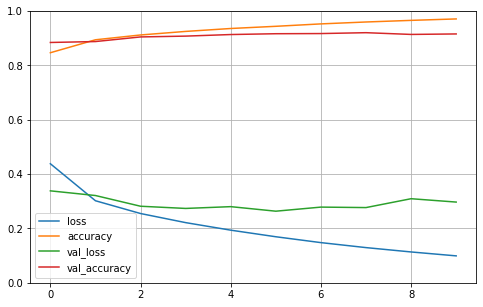

In [7]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [62]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train,y_pred)
print(conf_train)

[[5436    0    4   36    0    0   64    0    3    0]
 [   0 5441    0    1    0    0    1    0    1    0]
 [  58    1 4676   13  236    0  512    0    0    0]
 [   8    5    0 5456   24    0    6    0    0    0]
 [   3    0   15   66 5201    0  227    0    0    0]
 [   0    0    0    0    0 5504    0    3    0    0]
 [ 260    1   21   44   28    0 5153    0    0    0]
 [   0    0    0    0    0    2    0 5456    0   30]
 [   0    0    0    2    1    1    0    0 5506    0]
 [   0    0    0    0    0    1    0   49    0 5444]]


In [9]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3203093339562416, 0.9075]

In [10]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[840   0  19  15   2   0 108   0  16   0]
 [  1 981   0  13   0   0   3   0   2   0]
 [ 15   1 903   8  25   0  46   0   2   0]
 [ 16   7  11 927   8   0  27   0   4   0]
 [  0   1 106  36 799   0  55   0   3   0]
 [  0   0   1   0   0 970   0  22   0   7]
 [103   0  72  28  45   0 738   0  14   0]
 [  0   0   0   0   0   3   0 984   0  13]
 [  2   2   2   5   0   1   2   3 983   0]
 [  1   0   0   0   0   6   1  42   0 950]]


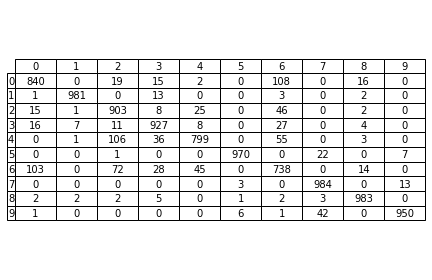

In [11]:
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('CNN_conf_mat.pdf')